In [46]:
import numpy as np
import matplotlib.pyplot as plt

In [69]:
def fobj(X_Swarm,X_Optimal): ## this is the sphere function
    return np.sum((X_Swarm - X_Optimal)**2,0)


## 
Number_Of_Variables = 10 # they called this nVar
Upper_Bounds = 10*np.ones(Number_Of_Variables) ## they called thus up
Lower_Bounds = -10*np.ones(Number_Of_Variables) ## they called it lb




### Defining the hyperparameters

Number_Of_Particles = 30 ### they called this noP
Number_Of_Iterations = 500 ## They called this maxlter

# Weight_Of_Inertia = 1 ## This is the hyperparameter "w"
W_Max = 0.9 ## this is the Initial weight of the inertia
W_Min = 0.2 ## this is the final weight of the inertia
c1 = 2 ## This is the individual weight (best found location so far)
c2 = 2 ## this is the social weight (best found location from team)






In [70]:
## initializing the Swarm object


class Particles(object):
    def __init__(self, Upper_Bounds,Lower_Bounds,Number_Of_Variables,PBEST):
        self.V = np.zeros((Number_Of_Particles,Number_Of_Variables))
        self.X = np.zeros((Number_Of_Particles,Number_Of_Variables))
        self.O = 10**30*np.ones(Number_Of_Particles)
        for k in range (0,Number_Of_Particles):
            self.X[k,:] = (Upper_Bounds-Lower_Bounds)*np.random.rand(Number_Of_Variables ) + Lower_Bounds

        
        self.PBEST = PBEST(Number_Of_Variables,Number_Of_Particles)
            
class PBEST(object):
    
    def __init__(self,Number_Of_Variables,Number_Of_Particles):
#             self.X[k,:] = np.zeros(Number_Of_Variables)
            self.X = np.zeros((Number_Of_Particles,Number_Of_Variables))
            self.O = 10**30*np.ones(Number_Of_Particles)
            
            
            
class GBEST(object):
    
    def __init__(self,Number_Of_Variables,Number_Of_Particles):
#             self.X[k,:] = np.zeros(Number_Of_Variables)
            self.X = np.zeros(Number_Of_Variables)
            self.O = 10**30
            

class Swarm(object):
    
    def __init__(self,Upper_Bounds,Lower_Bounds,Number_Of_Variables,PBEST,Particles):
        self.Particles = Particles(Upper_Bounds,Lower_Bounds,Number_Of_Variables,PBEST)
        self.GBEST = GBEST(Number_Of_Variables,Number_Of_Particles)
    
    

Particles1 = Particles(Upper_Bounds,Lower_Bounds,Number_Of_Variables,PBEST)

Swarm1 = Swarm(Upper_Bounds,Lower_Bounds,Number_Of_Variables,PBEST,Particles)
print(Swarm1.Particles.PBEST.O)

[1e+30 1e+30 1e+30 1e+30 1e+30 1e+30 1e+30 1e+30 1e+30 1e+30 1e+30 1e+30
 1e+30 1e+30 1e+30 1e+30 1e+30 1e+30 1e+30 1e+30 1e+30 1e+30 1e+30 1e+30
 1e+30 1e+30 1e+30 1e+30 1e+30 1e+30]


In [71]:
## Mail loop

X_Optimal = (Upper_Bounds-Lower_Bounds)*np.random.rand(Number_Of_Variables ) + Lower_Bounds


# print(Swarm1.Particles.PBEST.O)
Cost_Vector = np.zeros(Number_Of_Iterations)
for t in range(0,Number_Of_Iterations):
    
    ## this is to get the 
    for k in range(0,Number_Of_Particles):
        
        ## Calculate the curent Objective
        Swarm1.Particles.O[k] = fobj(Swarm1.Particles.X[k,:],X_Optimal) 
        
        ##  update PBEST
        if Swarm1.Particles.O[k] < Swarm1.Particles.PBEST.O[k]:
            Swarm1.Particles.PBEST.O[k] = Swarm1.Particles.O[k]
            Swarm1.Particles.PBEST.X[k,:] = Swarm1.Particles.X[k,:]          
        
        ## Update GBEST
        if Swarm1.Particles.O[k] < Swarm1.GBEST.O:
            Swarm1.GBEST.O = Swarm1.Particles.O[k]   
            Swarm1.GBEST.X[:] = Swarm1.Particles.X[k,:]  

    #### Update the X and V vectors
    w = W_Max - t*(W_Max - W_Min)/Number_Of_Iterations
    
    for k in range(0,Number_Of_Particles):
        Swarm1.Particles.V[k,:] = w*Swarm1.Particles.V[k,:]\
                                + c1*np.random.rand(Number_Of_Variables)*(Swarm1.Particles.PBEST.X[k,:] - Swarm1.Particles.X[k,:] )\
                                + c2*np.random.rand(Number_Of_Variables)*(Swarm1.GBEST.X- Swarm1.Particles.X[k,:] )
        
        Swarm1.Particles.X[k,:] = Swarm1.Particles.X[k,:] + Swarm1.Particles.V[k,:]
        
    Cost_Vector[t] =    Swarm1.GBEST.O

    
    
    

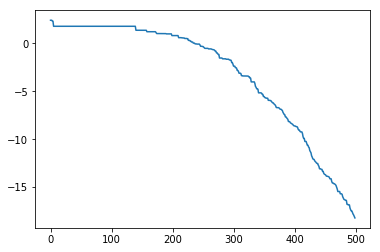

In [72]:
plt.plot(np.log10(Cost_Vector))